In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data_1= pd.read_csv('sleep_health_and_lifestyle_data_test_hidden.csv') #Hidden daTaset

In [3]:
df= pd.DataFrame(data)
df_1= pd.DataFrame(data_1) #Hidden daTaset

In [4]:
df.size

4108

In [5]:
df.shape

(316, 13)

In [6]:
df.drop(columns= 'Person ID', inplace= True)
df_1.drop(columns= 'Person ID', inplace= True) #Hidden daTaset

In [7]:
df.dtypes

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [8]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
df_1.head() #Hidden daTaset

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
1,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
2,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
3,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
4,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   316 non-null    object 
 1   Age                      316 non-null    int64  
 2   Occupation               316 non-null    object 
 3   Sleep Duration           316 non-null    float64
 4   Quality of Sleep         316 non-null    int64  
 5   Physical Activity Level  316 non-null    int64  
 6   Stress Level             316 non-null    int64  
 7   BMI Category             316 non-null    object 
 8   Blood Pressure           316 non-null    object 
 9   Heart Rate               316 non-null    int64  
 10  Daily Steps              316 non-null    int64  
 11  Sleep Disorder           316 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 29.8+ KB


In [11]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,40.237342,7.023418,7.151899,60.696203,5.556962,70.518987,6890.822785
std,7.989914,0.703611,1.116555,19.469703,1.646521,4.042978,1521.448126
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,33.000000,6.400000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,39.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [12]:
df.nunique()

Gender                      2
Age                        25
Occupation                 11
Sleep Duration             25
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                4
Blood Pressure             24
Heart Rate                 19
Daily Steps                20
Sleep Disorder              3
dtype: int64

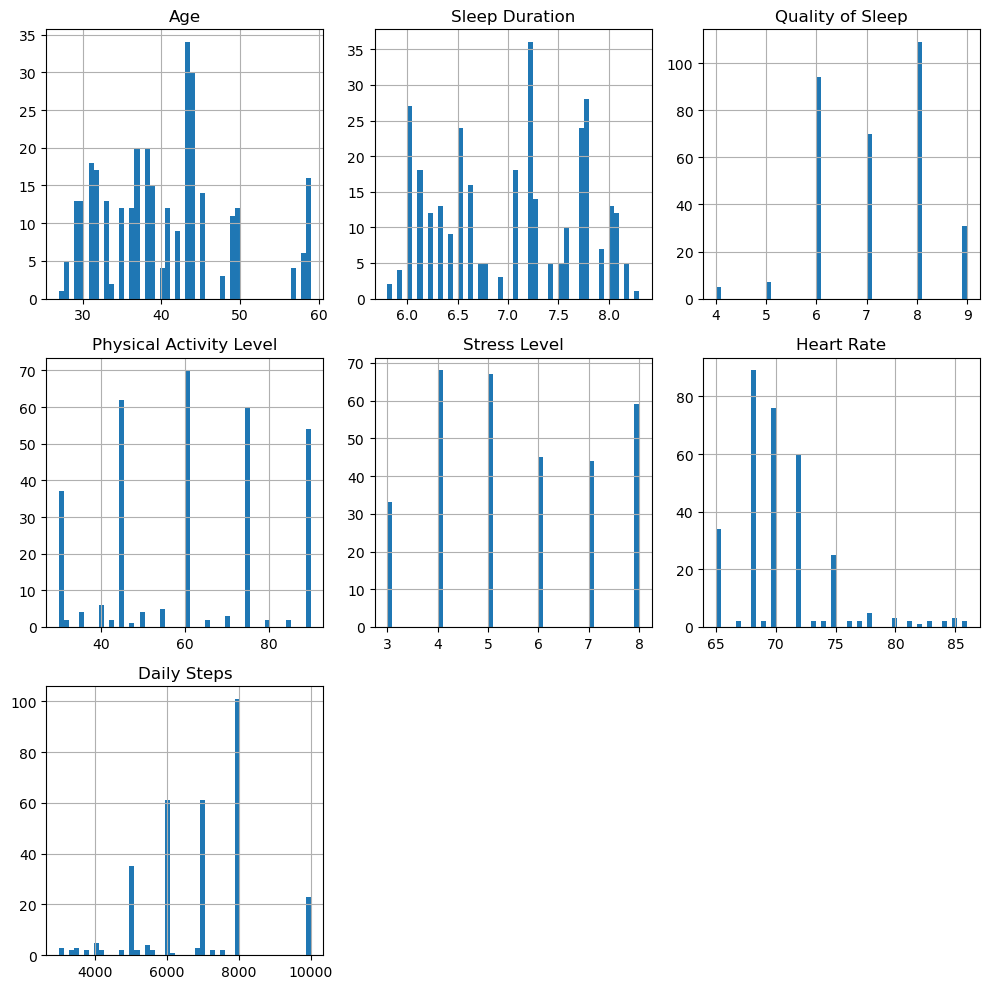

In [13]:
df.hist(bins=50, figsize=(10,10))
plt.tight_layout()
plt.show()

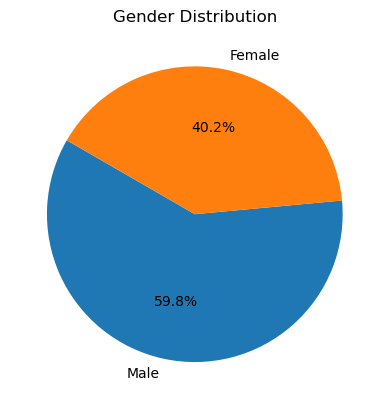

In [14]:
plt.pie(df['Gender'].value_counts().values, labels= df['Gender'].value_counts().index, autopct= '%1.1f%%', startangle= 150)
plt.title('Gender Distribution')
plt.show()

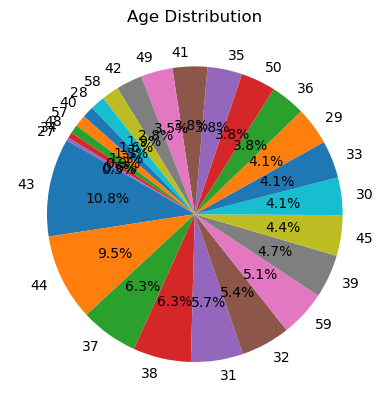

In [15]:
plt.pie(df['Age'].value_counts().values, labels= df['Age'].value_counts().index, autopct= '%1.1f%%', startangle= 150)
plt.title('Age Distribution')
plt.show()

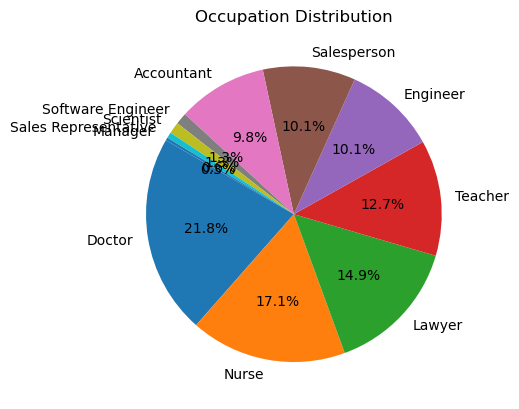

In [16]:
plt.pie(df['Occupation'].value_counts().values, labels= df['Occupation'].value_counts().index, autopct= '%1.1f%%', startangle= 150)
plt.title('Occupation Distribution')
plt.show()

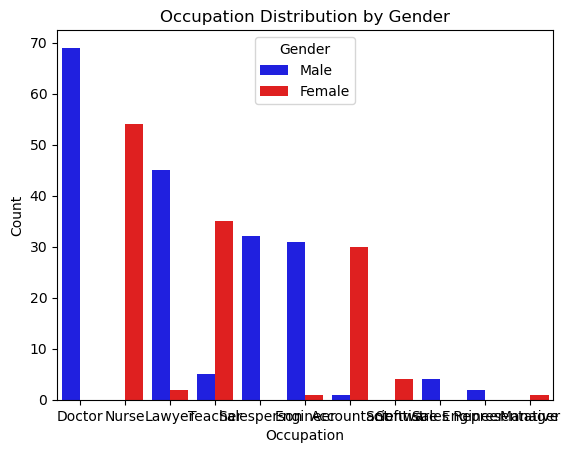

In [17]:
OC= df.groupby(['Occupation', 'Gender']).size().reset_index(name='count')
gender_colors= {'Male': 'blue', 'Female': 'red'}
OC= OC.sort_values(by= 'count', ascending= False)
sns.barplot(y= 'count', x= 'Occupation', hue= 'Gender', data= OC, palette= gender_colors, width= 0.8)
plt.title('Occupation Distribution by Gender')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

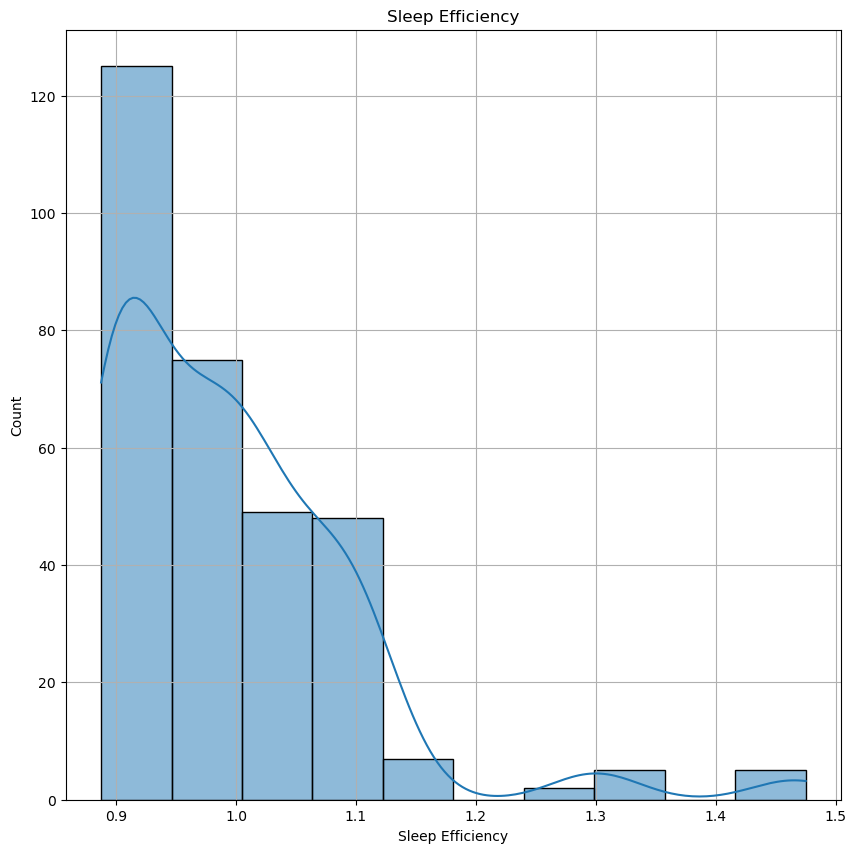

In [18]:
df["Sleep Efficiency"]= df["Sleep Duration"]/ df["Quality of Sleep"]
df_1["Sleep Efficiency"]= df_1["Sleep Duration"]/ df_1["Quality of Sleep"]
plt.figure(figsize=(10, 10))
sns.histplot(data= df, x= "Sleep Efficiency", bins= 10, kde= True)
plt.title("Sleep Efficiency")
plt.grid(True)
plt.show()

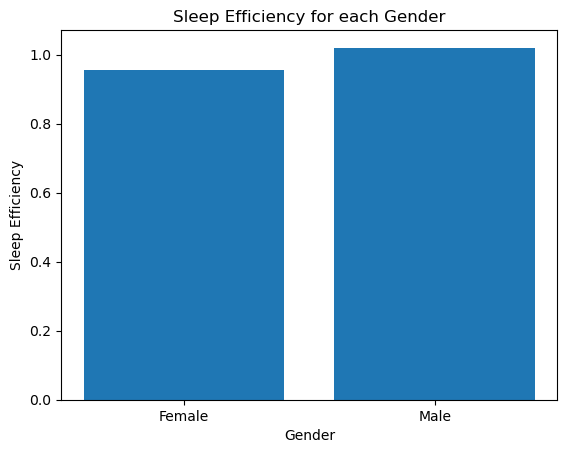

In [19]:
SE= df.groupby("Gender")["Sleep Efficiency"].mean()
plt.bar(SE.index, SE)
plt.xlabel("Gender")
plt.ylabel("Sleep Efficiency")
plt.title("Sleep Efficiency for each Gender")
plt.show()

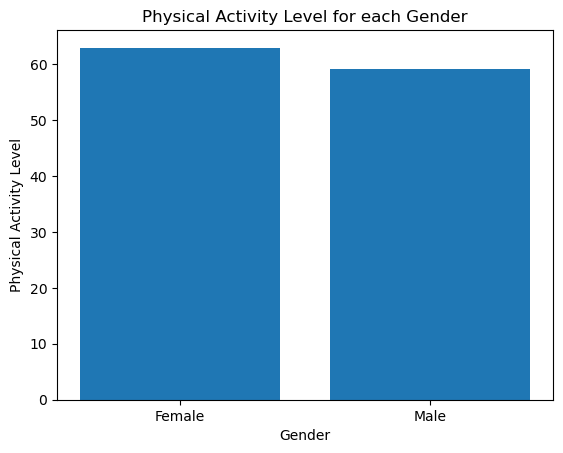

In [20]:
PAL= df.groupby("Gender")["Physical Activity Level"].mean()
plt.bar(PAL.index, PAL)
plt.xlabel("Gender")
plt.ylabel("Physical Activity Level")
plt.title("Physical Activity Level for each Gender")
plt.show()

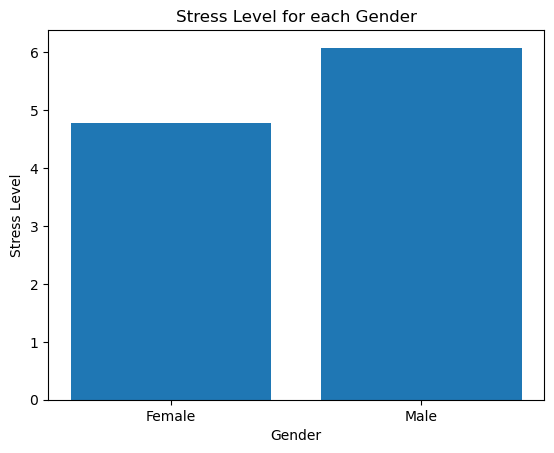

In [21]:
SL= df.groupby("Gender")["Stress Level"].mean()
plt.bar(SL.index, SL)
plt.xlabel("Gender")
plt.ylabel("Stress Level")
plt.title("Stress Level for each Gender")
plt.show()

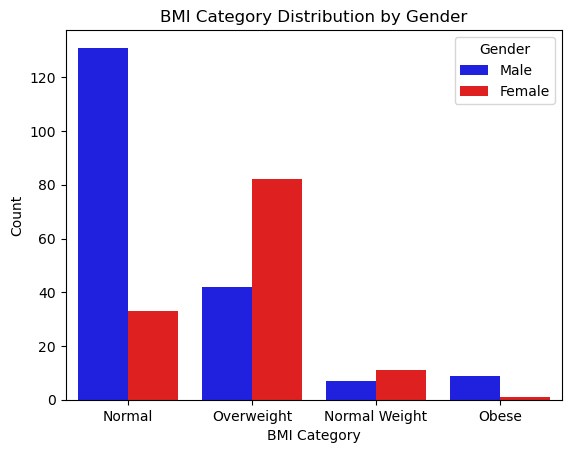

In [22]:
BMI= df.groupby( ['BMI Category', 'Gender']).size().reset_index(name='count')
gender_colors= {'Male': 'blue', 'Female': 'red'}
BMI= BMI.sort_values(by= 'count', ascending= False)
sns.barplot(y= 'count', x= 'BMI Category', hue= 'Gender', data =BMI, palette= gender_colors, width= 0.8)
plt.title('BMI Category Distribution by Gender')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


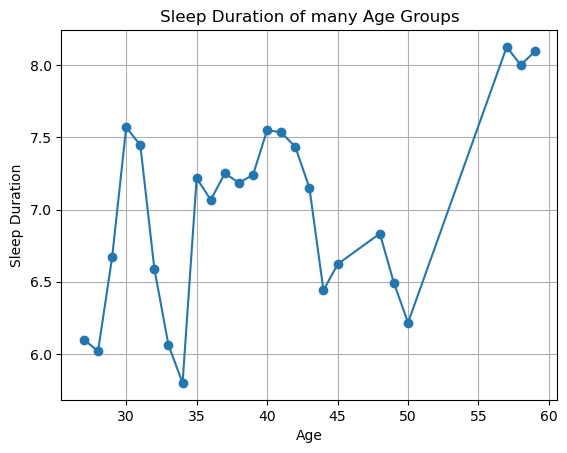

In [23]:
SD= df.groupby("Age")["Sleep Duration"].mean().reset_index()
plt.plot(SD["Age"], SD["Sleep Duration"], marker='o')
plt.xlabel("Age")
plt.ylabel("Sleep Duration")
plt.title("Sleep Duration of many Age Groups")
plt.grid(True)
plt.show()

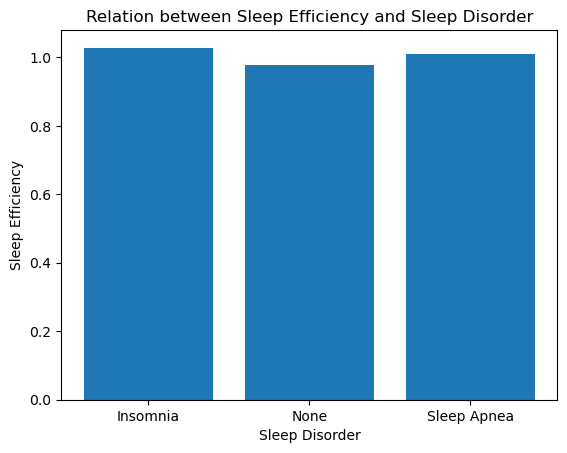

In [24]:
S_SE= df.groupby("Sleep Disorder")["Sleep Efficiency"].mean()
plt.bar(S_SE.index, S_SE)
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep Efficiency")
plt.title("Relation between Sleep Efficiency and Sleep Disorder")
plt.show()

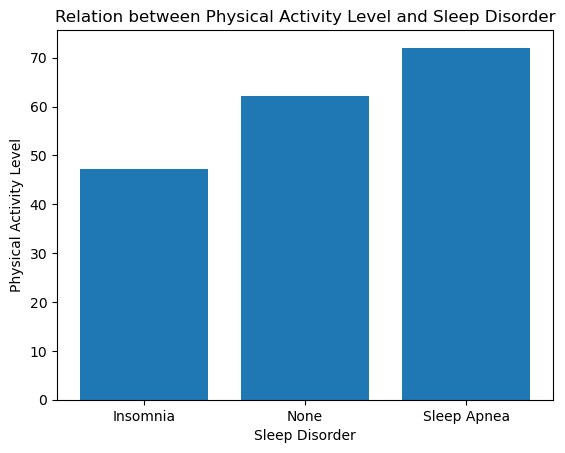

In [25]:
S_PAL= df.groupby("Sleep Disorder")["Physical Activity Level"].mean()
plt.bar(S_PAL.index, S_PAL)
plt.xlabel("Sleep Disorder")
plt.ylabel("Physical Activity Level")
plt.title("Relation between Physical Activity Level and Sleep Disorder")
plt.show()

<Axes: >

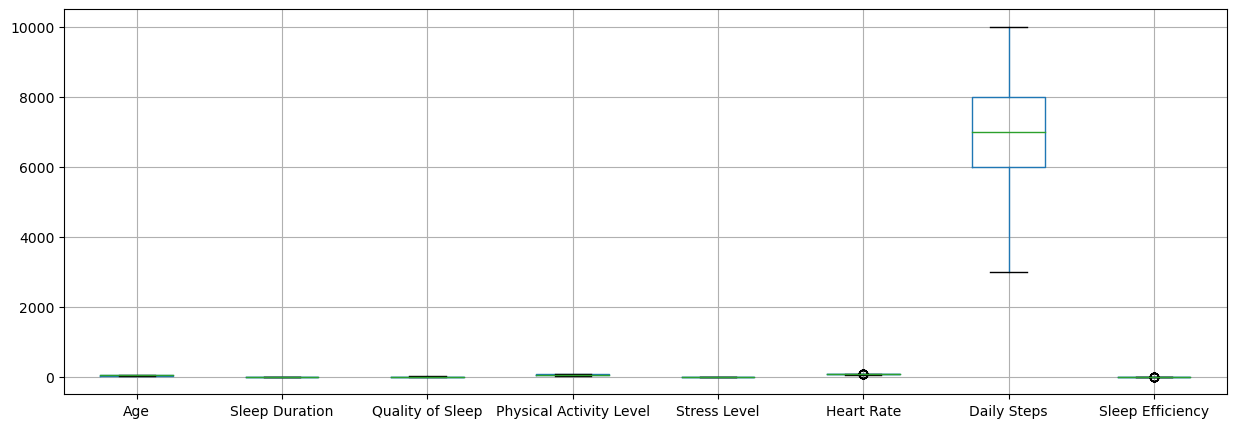

In [26]:
df.boxplot(figsize=(15,5))

C:\Users\#Sa3doun\AppData\Local\Temp\ipykernel_10900\101543641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


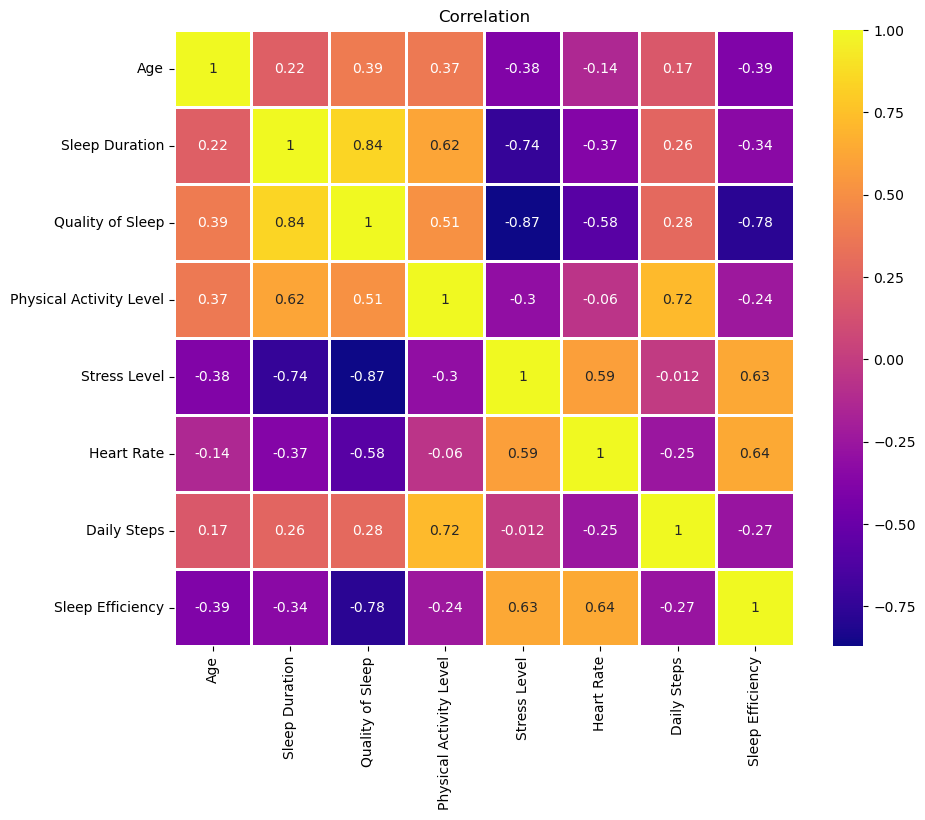

In [27]:
corr= df.corr()
plt.figure(figsize= (10, 8))
sns.heatmap(corr, annot= True, cmap= "plasma", linewidths= 1)
plt.title("Correlation")
plt.show()

In [28]:
LE= LabelEncoder()
df['Gender']= LE.fit_transform(df['Gender'])
df['Occupation']= LE.fit_transform(df['Occupation'])
df['BMI Category']= LE.fit_transform(df['BMI Category'])
df['Blood Pressure']= LE.fit_transform(df['Blood Pressure'])
df['Sleep Disorder']= LE.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Efficiency
0,1,27,9,6.1,6,42,6,3,10,77,4200,1,1.016667
1,1,28,1,6.2,6,60,8,0,8,75,10000,1,1.033333
2,1,28,1,6.2,6,60,8,0,8,75,10000,1,1.033333
3,1,28,6,5.9,4,30,8,2,21,85,3000,2,1.475000
4,1,28,6,5.9,4,30,8,2,21,85,3000,2,1.475000


In [29]:
#Hidden daTaset
LE= LabelEncoder()
df_1['Gender']= LE.fit_transform(df_1['Gender'])
df_1['Occupation']= LE.fit_transform(df_1['Occupation'])
df_1['BMI Category']= LE.fit_transform(df_1['BMI Category'])
df_1['Blood Pressure']= LE.fit_transform(df_1['Blood Pressure'])
df_1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Efficiency
0,0,50,3,6.0,6,90,8,2,4,75,10000,1.000000
1,0,50,3,6.1,6,90,8,2,4,75,10000,1.016667
2,0,50,3,6.1,6,90,8,2,4,75,10000,1.016667
3,0,50,3,6.0,6,90,8,2,4,75,10000,1.000000
4,0,50,3,6.1,6,90,8,2,4,75,10000,1.016667


In [30]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Sleep Efficiency           0
dtype: int64

In [31]:
df.duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
311     True
312     True
313     True
314     True
315     True
Length: 316, dtype: bool

In [32]:
df.drop_duplicates()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep Efficiency
0,1,27,9,6.1,6,42,6,3,10,77,4200,1,1.016667
1,1,28,1,6.2,6,60,8,0,8,75,10000,1,1.033333
3,1,28,6,5.9,4,30,8,2,21,85,3000,2,1.475000
5,1,28,9,5.9,4,30,8,2,21,85,3000,0,1.475000
6,1,29,10,6.3,6,40,7,2,21,82,3500,0,1.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,59,5,8.0,9,75,3,3,22,68,7000,1,0.888889
301,0,59,5,8.1,9,75,3,3,22,68,7000,1,0.900000
302,0,59,5,8.2,9,75,3,3,22,68,7000,2,0.911111
306,0,59,5,8.0,9,75,3,3,22,68,7000,2,0.888889


In [33]:
columns= ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
Q1= df[columns].quantile(0.25)
Q3= df[columns].quantile(0.75)
IQR= Q3- Q1
df= df[~((df[columns]< (Q1- 1.5* IQR))| (df[columns] > (Q3+ 1.5* IQR))).any(axis=1)] 

In [34]:
scaler= StandardScaler()
scaled_d= scaler.fit_transform(df)

In [35]:
scaler_0= MinMaxScaler()
norm_d= scaler_0.fit_transform(df)

In [36]:
transformed_d= np.log(df)

D:\Program Files\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [37]:
trans= PowerTransformer()
trans_d= trans.fit_transform(df)

In [39]:
X= df.drop(['Sleep Disorder'], axis=1)
y= df['Sleep Disorder']

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 50)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (210, 12)
X_test shape:  (91, 12)
y_train shape:  (210,)
y_test shape:  (91,)


In [41]:
X_train

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Efficiency
151,1,39,3,7.2,8,60,5,0,14,68,8000,0.900000
144,1,38,3,7.1,8,60,5,0,14,68,8000,0.887500
98,0,36,10,7.1,8,60,4,0,0,68,7000,0.887500
155,1,39,3,7.2,8,60,5,0,14,68,8000,0.900000
217,1,43,2,7.8,8,90,5,0,14,70,8000,0.975000
...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,33,1,6.0,6,30,8,0,8,72,5000,1.000000
141,1,38,3,7.1,8,60,5,0,14,68,8000,0.887500
304,0,59,5,8.2,9,75,3,3,22,68,7000,0.911111
118,0,37,0,7.2,8,60,4,0,0,68,7000,0.900000


In [42]:
y_train

151    1
144    2
98     1
155    1
217    1
      ..
76     1
141    1
304    2
118    1
187    0
Name: Sleep Disorder, Length: 210, dtype: int32

In [43]:
LR= LogisticRegression(multi_class= 'ovr')

In [44]:
param_grid= {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'], 'solver': ['saga', 'liblinear'], 'max_iter': [100, 500, 1000]}

In [45]:
GS= GridSearchCV(LR, param_grid, cv= 5)
GS.fit(X_train, y_train)

D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [0.1, 1.0, 10.0], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']})

In [46]:
best_prams= GS.best_params_
best_model= GS.best_estimator_

In [47]:
y_test_pred= best_model.predict(X_test)
accur= accuracy_score(y_test, y_test_pred)

In [48]:
best_prams

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [49]:
y_test_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1])

In [50]:
accur

0.9120879120879121

In [51]:
LR= LogisticRegression(multi_class= 'ovr', C= 0.5, intercept_scaling= 0.1, solver= 'saga')
LR.fit(X_train, y_train)

D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Program Files\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.5, intercept_scaling=0.1, multi_class='ovr',
                   solver='saga')

In [52]:
print('Train_LR.score:', LR.score(X_train, y_train))
print('Test_LR.score:', LR.score(X_test, y_test))

Train_LR.score: 0.6047619047619047
Test_LR.score: 0.6373626373626373


In [53]:
classification_report(y_test, LR.predict(X_test))

D:\Program Files\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        24\n           1       0.64      1.00      0.78        58\n           2       0.00      0.00      0.00         9\n\n    accuracy                           0.64        91\n   macro avg       0.21      0.33      0.26        91\nweighted avg       0.41      0.64      0.50        91\n'

In [54]:
X_train

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Efficiency
151,1,39,3,7.2,8,60,5,0,14,68,8000,0.900000
144,1,38,3,7.1,8,60,5,0,14,68,8000,0.887500
98,0,36,10,7.1,8,60,4,0,0,68,7000,0.887500
155,1,39,3,7.2,8,60,5,0,14,68,8000,0.900000
217,1,43,2,7.8,8,90,5,0,14,70,8000,0.975000
...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,33,1,6.0,6,30,8,0,8,72,5000,1.000000
141,1,38,3,7.1,8,60,5,0,14,68,8000,0.887500
304,0,59,5,8.2,9,75,3,3,22,68,7000,0.911111
118,0,37,0,7.2,8,60,4,0,0,68,7000,0.900000


In [55]:
X_test

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Efficiency
250,0,45,10,6.8,7,30,6,3,19,65,6000,0.971429
106,0,37,5,6.1,6,42,6,3,10,77,4200,1.016667
214,1,43,2,7.8,8,90,5,0,14,70,8000,0.975000
231,1,44,7,6.3,6,45,7,3,14,72,6000,1.050000
111,1,37,3,7.4,8,60,5,0,14,68,8000,0.925000
...,...,...,...,...,...,...,...,...,...,...,...,...
124,0,37,0,7.2,8,60,4,0,0,68,7000,0.900000
109,1,37,3,7.4,8,60,5,0,14,68,8000,0.925000
117,0,37,0,7.2,8,60,4,0,0,68,7000,0.900000
305,0,59,5,8.2,9,75,3,3,22,68,7000,0.911111


In [56]:
def rocAuc(model, Xtest, ytest, model_name):
    cols= model.classes_
    y_test_binarized= pd.get_dummies(ytest, prefix= ['Class'])
    try:
            score= model.decision_function(Xtest)
    except:
            score= model.predict_proba(Xtest)
    
    fpr= {}
    tpr= {}
    roc_auc= {}
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _= roc_curve(y_test_binarized.iloc[:,i],score[:,i])
        roc_auc[i]= auc(fpr[i],tpr[i])
        
    plt.figure(figsize= (7,7))
    for i in range(len(model.classes_)):
        plt.plot(fpr[i], tpr[i], label= f'{cols[i]}-vs-Rest curve (area= %0.2f)' % roc_auc[i])
    
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} Receiver Operation Characteristic")
    plt.legend(loc='lower right')
    plt.show()

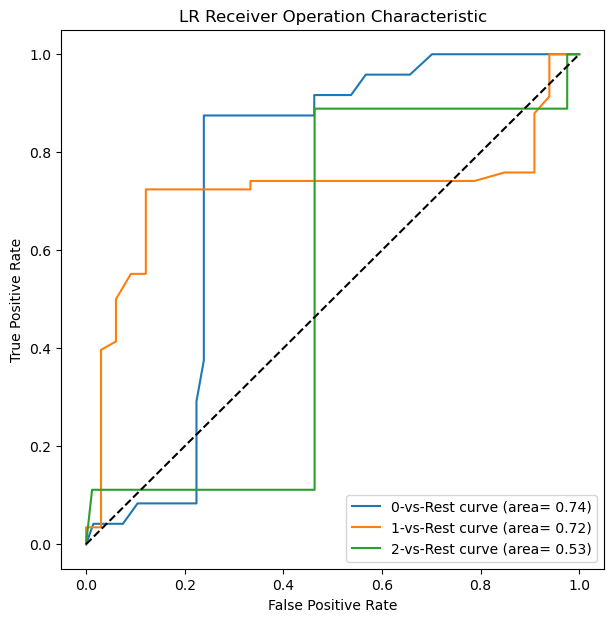

None


In [57]:
roc_curve= rocAuc(LR, X_test, y_test, 'LR')
print(roc_curve)

In [58]:
f1_s= f1_score(y_test, y_test_pred, average= 'weighted')
print('f1_score:', format(f1_s))

f1_score: 0.9105561105561105


In [59]:
pred_1= best_model.predict(df_1)
pred_1

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1])

In [60]:
prediction= pd.DataFrame(pred_1)

In [61]:
prediction.to_csv('Desktop/prediction_Alaa.csv', index= False)